In [196]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter('ignore')

### 1. Loading data

In [197]:
# Read data
prev_apps = pd.read_csv('previous_application.csv')

In [198]:
prev_apps.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,...,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,...,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,...,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,...,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,...,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


In [199]:
prev_apps.shape

(1670214, 37)

In [200]:
cur_apps = pd.read_csv('application_data.csv')

In [201]:
cur_apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [202]:
cur_apps.shape

(307511, 122)

### 2. Merge data into single dataframe

In [203]:
all_apps = cur_apps.merge(prev_apps, how='left', on='SK_ID_CURR', suffixes=(None, '_PREV'))

In [204]:
all_apps.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,Auto technology,24.0,low_normal,POS other with interest,365243.0,-565.0,125.0,-25.0,-17.0,0.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,XNA,12.0,low_normal,Cash X-Sell: low,365243.0,-716.0,-386.0,-536.0,-527.0,1.0
2,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Furniture,6.0,middle,POS industry with interest,365243.0,-797.0,-647.0,-647.0,-639.0,0.0
3,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,Consumer electronics,12.0,middle,POS household with interest,365243.0,-2310.0,-1980.0,-1980.0,-1976.0,1.0
4,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,Connectivity,4.0,middle,POS mobile without interest,365243.0,-784.0,-694.0,-724.0,-714.0,0.0


In [205]:
all_apps.shape

(1430155, 158)

### 3. Missing values

In [206]:
all_apps.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1430155 entries, 0 to 1430154
Columns: 158 entries, SK_ID_CURR to NFLAG_INSURED_ON_APPROVAL
dtypes: float64(85), int64(41), object(32)
memory usage: 1.7+ GB


In [207]:
all_apps.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=158)

In [208]:
# Store variables
cols = all_apps.columns
sz = all_apps.shape[0]

In [209]:
na_df = pd.DataFrame(columns=['name', 'null count', 'null percent', 'type'])

for col in cols:
    na_sum = all_apps[col].isna().sum()
    if na_sum != 0:
        na_percent = na_sum / sz * 100
        na_df = na_df.append({'name': col, 'null count': na_sum, 'type': all_apps[col].dtype, 'null percent': na_percent}, ignore_index=True)



In [210]:
na_df.sort_values(by='null percent', ascending=False, inplace=True)

In [211]:
na_df

,name,null count,null percent,type
79,RATE_INTEREST_PRIMARY,1425364,99.665001,float64
80,RATE_INTEREST_PRIVILEGED,1425364,99.665001,float64
41,COMMONAREA_MEDI,995502,69.607980,float64
13,COMMONAREA_AVG,995502,69.607980,float64
27,COMMONAREA_MODE,995502,69.607980,float64
...,...,...,...,...
7,EXT_SOURCE_2,1901,0.132923,float64
1,AMT_GOODS_PRICE,1219,0.085236,float64
0,AMT_ANNUITY,93,0.006503,float64
5,CNT_FAM_MEMBERS,2,0.000140,float64


In [212]:
# na_df['name'].values[-2:]

In [213]:
# missing_y = list(filter(lambda x: x[-2:] == '_y', na_df['name'].values))

In [214]:
# missing_y

In [215]:
# na_df[na_df]

In [216]:
# na_df[na_df['name'][-2:] == '_y']

#### 3.1. Dropping columns with > 50% values missing

In [217]:
large_empty_cols = na_df[na_df['null percent'] > 50]['name'].values

In [218]:
large_empty_cols.size

38

In [219]:
type(large_empty_cols)

numpy.ndarray

In [220]:
all_apps.drop(large_empty_cols, axis=1, inplace=True)

In [221]:
# Verifying that the correct number of columns were dropped
# There were 154 before, and 34 were dropped, leaving 120.
all_apps.shape

(1430155, 120)

### 3.2. Dropping rows for columns with < 2% values missing

In [222]:
small_empty_cols = na_df[na_df['null percent'] < 2]['name'].values

In [223]:
small_empty_cols

array(['PRODUCT_COMBINATION', 'AMT_CREDIT_PREV', 'DAYS_DECISION',
       'NAME_GOODS_CATEGORY', 'NAME_CLIENT_TYPE', 'NAME_PORTFOLIO',
       'CODE_REJECT_REASON', 'NAME_PRODUCT_TYPE', 'NAME_PAYMENT_TYPE',
       'CHANNEL_TYPE', 'NAME_CASH_LOAN_PURPOSE',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NAME_CONTRACT_STATUS',
       'NAME_YIELD_GROUP', 'NFLAG_LAST_APPL_IN_DAY',
       'NAME_SELLER_INDUSTRY', 'HOUR_APPR_PROCESS_START_PREV',
       'WEEKDAY_APPR_PROCESS_START_PREV', 'AMT_APPLICATION',
       'NAME_CONTRACT_TYPE_PREV', 'SK_ID_PREV', 'SELLERPLACE_AREA',
       'NAME_TYPE_SUITE', 'DEF_30_CNT_SOCIAL_CIRCLE',
       'OBS_60_CNT_SOCIAL_CIRCLE', 'DEF_60_CNT_SOCIAL_CIRCLE',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'EXT_SOURCE_2', 'AMT_GOODS_PRICE',
       'AMT_ANNUITY', 'CNT_FAM_MEMBERS', 'DAYS_LAST_PHONE_CHANGE'],
      dtype=object)

In [224]:
na_df[na_df['null percent'] < 2]

,name,null count,null percent,type
96,PRODUCT_COMBINATION,16767,1.172390,object
71,AMT_CREDIT_PREV,16455,1.150575,float64
83,DAYS_DECISION,16454,1.150505,float64
88,NAME_GOODS_CATEGORY,16454,1.150505,object
87,NAME_CLIENT_TYPE,16454,1.150505,object
89,NAME_PORTFOLIO,16454,1.150505,object
85,CODE_REJECT_REASON,16454,1.150505,object
90,NAME_PRODUCT_TYPE,16454,1.150505,object
84,NAME_PAYMENT_TYPE,16454,1.150505,object
91,CHANNEL_TYPE,16454,1.150505,object


In [225]:
all_apps.shape

(1430155, 120)

In [226]:
# Drop using loop
for col in small_empty_cols:
    all_apps = all_apps[~all_apps[col].isna()]
    

In [227]:
#Verification
all_apps.shape

(1404812, 120)

### 3.3. Checking remaining columns with missing values

In [228]:
med_empty_cols = na_df[(na_df['null percent'] >= 2) & (na_df['null percent'] <= 50)]

In [229]:
med_empty_cols

,name,null count,null percent,type
29,ENTRANCES_MODE,713388,49.881866,float64
15,ENTRANCES_AVG,713388,49.881866,float64
43,ENTRANCES_MEDI,713388,49.881866,float64
86,NAME_TYPE_SUITE_PREV,711126,49.723701,object
34,LIVINGAREA_MODE,711001,49.714961,float64
20,LIVINGAREA_AVG,711001,49.714961,float64
48,LIVINGAREA_MEDI,711001,49.714961,float64
52,HOUSETYPE_MODE,710772,49.698949,object
30,FLOORSMAX_MODE,705019,49.296685,float64
16,FLOORSMAX_AVG,705019,49.296685,float64


#### These columns don't have enough missing values to drop them, but they have enough missing values that dropping those rows would reduce the amount of data available.
#### Since the missing values are not changing the type of the columns, meaning they are not affecting any statistical operations on the columns, it is safe to leave these columns as they are.
#### However, care should be taken to take this into account when performing any operation involving these columns.

### 4. Outlier detection & handling

#### 4.1. Outlier detection

In [230]:
cols

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT', 'NAME_YIELD_GROUP',
       'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING', 'DAYS_FIRST_DUE',
       'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE', 'DAYS_TERMINATION',
       'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object', length=158)

In [231]:
# Collect all numeric columns into one dataframe
all_apps_numeric = pd.DataFrame()

# Loop over columns and check the type
for col in all_apps.columns:
    if ('_ID_' in col) or ('FLAG_' in col) or col == 'TARGET':
        # Ignore ids and flags and Target variable
        continue
    if (np.issubdtype(all_apps[col], np.number)):
        all_apps_numeric[col] = all_apps[col]

In [232]:
all_apps_numeric.head()

,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,CNT_FAM_MEMBERS,...,AMT_GOODS_PRICE_PREV,HOUR_APPR_PROCESS_START_PREV,DAYS_DECISION,SELLERPLACE_AREA,CNT_PAYMENT,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION
0,0,202500.0,406597.5,24700.5,351000.0,0.018801,-9461,-637,-3648.0,1.0,...,179055.0,9.0,-606.0,500.0,24.0,365243.0,-565.0,125.0,-25.0,-17.0
1,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,2.0,...,900000.0,12.0,-746.0,-1.0,12.0,365243.0,-716.0,-386.0,-536.0,-527.0
2,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,2.0,...,337500.0,17.0,-828.0,1400.0,6.0,365243.0,-797.0,-647.0,-647.0,-639.0
3,0,270000.0,1293502.5,35698.5,1129500.0,0.003541,-16765,-1188,-1186.0,2.0,...,68809.5,15.0,-2341.0,200.0,12.0,365243.0,-2310.0,-1980.0,-1980.0,-1976.0
4,0,67500.0,135000.0,6750.0,135000.0,0.010032,-19046,-225,-4260.0,1.0,...,24282.0,5.0,-815.0,30.0,4.0,365243.0,-784.0,-694.0,-724.0,-714.0


In [233]:
all_apps_outliers = pd.DataFrame(columns={'name', 'num outliers', 'outlier percent'})

# Get number of columns
sz = all_apps_numeric.shape[0]

# Loop over columns to find the first and third quartiles, the IQR, and any outliers
for col in all_apps_numeric.columns:
    descr = all_apps_numeric[col].describe()

    first = descr['25%']
    third = descr['75%']
    iqr = third - first
    lower = first - (1.5 * iqr)
    upper = third + (1.5 * iqr)

    # Filter outliers
    outliers = all_apps_numeric[(all_apps_numeric[col] < lower) | (all_apps_numeric[col] > upper)]

    num = outliers.shape[0]

    if (num == 0):
        continue

    percent = num / sz * 100

    # record in DataFrame
    all_apps_outliers = all_apps_outliers.append({'name': col, 'num outliers': num, 'outlier percent': percent}, ignore_index=True)

In [234]:
all_apps_outliers.sort_values(by='outlier percent', ascending=False, inplace=True)

In [235]:
all_apps_outliers

,outlier percent,name,num outliers
9,24.934796,REGION_RATING_CLIENT,350287
6,24.396076,DAYS_EMPLOYED,342719
10,24.017449,REGION_RATING_CLIENT_W_CITY,337400
16,22.201191,REG_CITY_NOT_WORK_CITY,311885
40,21.266191,AMT_REQ_CREDIT_BUREAU_QRT,298750
17,17.396990,LIVE_CITY_NOT_WORK_CITY,244395
39,16.328377,AMT_REQ_CREDIT_BUREAU_MON,229383
48,16.059160,SELLERPLACE_AREA,225601
54,13.732870,DAYS_TERMINATION,192921
53,12.793954,DAYS_LAST_DUE,179731


In [236]:
all_apps_outliers.shape

(55, 3)

### 4.1.1. Checking detected outliers

In [237]:
# Writing outliers to file for ease in analysis, since there are 56 such columns
def write_outliers_to_file(cols):
    with open('outliers_info.txt', 'w') as f:
        for col in cols:
            res = ''

            # print(col)
            res = res + 'Column: ' + col + '\n'

            res = res + str(all_apps[col].value_counts())

            res = res + '\n\n'

            f.write(res)


    f.close()

    # print(res)



In [238]:
write_outliers_to_file(list(all_apps_outliers['name'].values))

In [239]:
all_apps['REGION_RATING_CLIENT'].value_counts()

2    1054525
3     217268
1     133019
Name: REGION_RATING_CLIENT, dtype: int64

### 4.1.2. Wrongly detected outliers
#### These are categorical variables where one option happens to be in more rows than the others. These should be treated as categorical variables
* HOUR_APPR_PROCESS_START_x
* HOUR_APPR_PROCESS_START_y
* REGION_RATING_CLIENT
* REGION_RATING_CLIENT_W_CITY
* REG_CITY_NOT_WORK_CITY
* LIVE_CITY_NOT_WORK_CITY
* REG_CITY_NOT_LIVE_CITY
* REG_REGION_NOT_WORK_REGION
* LIVE_REGION_NOT_WORK_REGION
* REG_REGION_NOT_LIVE_REGION

#### These should be binned
* DEF_30_CNT_SOCIAL_CIRCLE
* DEF_60_CNT_SOCIAL_CIRCLE
* OBS_30_CNT_SOCIAL_CIRCLE
* OBS_60_CNT_SOCIAL_CIRCLE
* CNT_CHILDREN
* CNT_PAYMENT
* CNT_FAM_MEMBERS
* AMT_REQ_CREDIT_BUREAU_WEEK
* AMT_REQ_CREDIT_BUREAU_YEAR
* AMT_REQ_CREDIT_BUREAU_HOUR
* AMT_REQ_CREDIT_BUREAU_DAY

#### Filter the loop
* TARGET

### 4.1.3. Binning

#### 4.1.3.1. DEF_30_CNT_SOCIAL_CIRCLE

In [240]:
all_apps.DEF_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0     1233813
1.0      136549
2.0       25972
3.0        6470
4.0        1644
5.0         289
6.0          66
7.0           4
34.0          3
8.0           2
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [241]:
max_val = all_apps.DEF_30_CNT_SOCIAL_CIRCLE.max()

In [242]:
x = pd.cut(all_apps.DEF_30_CNT_SOCIAL_CIRCLE, [0,1,6,max_val + 1], right=False, labels=['0', '1 to 5', 'More than 5'])

In [243]:
x.value_counts()

0              1233813
1 to 5          170924
More than 5         75
Name: DEF_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [244]:
all_apps.DEF_30_CNT_SOCIAL_CIRCLE = x

#### 4.1.3.2. DEF_60_CNT_SOCIAL_CIRCLE

In [245]:
all_apps.DEF_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0     1278668
1.0      105987
2.0       15877
3.0        3231
4.0         919
5.0         109
6.0          14
7.0           4
24.0          3
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [246]:
max_val = all_apps.DEF_60_CNT_SOCIAL_CIRCLE.max()

In [247]:
x = pd.cut(all_apps.DEF_60_CNT_SOCIAL_CIRCLE, [0,1,5,max_val + 1], right=False, labels=['0', '1 to 5', 'More than 5'])

In [248]:
x.value_counts()

0              1278668
1 to 5          126014
More than 5        130
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [249]:
all_apps.DEF_60_CNT_SOCIAL_CIRCLE = x

#### 4.1.3.3. OBS_30_CNT_SOCIAL_CIRCLE

In [250]:
all_apps.OBS_30_CNT_SOCIAL_CIRCLE.value_counts()

0.0      729871
1.0      220142
2.0      137713
3.0       95957
4.0       67783
5.0       46944
6.0       32875
7.0       22917
8.0       15217
9.0       11057
10.0       7545
11.0       4762
12.0       3994
13.0       2442
14.0       1555
15.0       1087
16.0        838
17.0        632
19.0        335
18.0        296
20.0        205
21.0        173
22.0        163
24.0         80
25.0         76
23.0         57
27.0         40
29.0         19
26.0         15
30.0         13
47.0          4
348.0         3
28.0          2
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [251]:
max_val = all_apps.OBS_30_CNT_SOCIAL_CIRCLE.max()

In [252]:
x = pd.cut(all_apps.OBS_30_CNT_SOCIAL_CIRCLE, [0,1,10,20,30,max_val + 1], right=False, labels=['0', '1 to 10', '11 to 20', '21 to 30', 'More than 30'])

In [253]:
x.value_counts()

0               729871
1 to 10         650605
11 to 20         23486
21 to 30           830
More than 30        20
Name: OBS_30_CNT_SOCIAL_CIRCLE, dtype: int64

In [254]:
all_apps.OBS_30_CNT_SOCIAL_CIRCLE = x

#### 4.1.3.4. OBS_60_CNT_SOCIAL_CIRCLE

In [255]:
all_apps.OBS_60_CNT_SOCIAL_CIRCLE.value_counts()

0.0      733149
1.0      220668
2.0      137682
3.0       95461
4.0       66999
5.0       46441
6.0       32412
7.0       22779
8.0       14728
9.0       10800
10.0       7396
11.0       4749
12.0       3744
13.0       2417
14.0       1449
15.0       1066
16.0        872
17.0        564
18.0        316
19.0        301
20.0        226
21.0        157
22.0        138
24.0         95
25.0         65
23.0         50
27.0         40
29.0         27
26.0          7
30.0          5
47.0          4
344.0         3
28.0          2
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [256]:
max_val = all_apps.OBS_60_CNT_SOCIAL_CIRCLE.max()

In [257]:
x = pd.cut(all_apps.OBS_60_CNT_SOCIAL_CIRCLE, [0,1,10,20,30,max_val + 1], right=False, labels=['0', '1 to 10', '11 to 20', '21 to 30', 'More than 30'])

In [258]:
x.value_counts()

0               733149
1 to 10         647970
11 to 20         22874
21 to 30           807
More than 30        12
Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64

In [259]:
all_apps.OBS_60_CNT_SOCIAL_CIRCLE = x

#### 4.1.3.5. CNT_CHILDREN

In [260]:
all_apps.CNT_CHILDREN.value_counts()

0     998783
1     266820
2     119595
3      17116
4       1912
5        415
6         99
7         19
10        16
8          8
19         8
9          7
14         7
12         4
11         3
Name: CNT_CHILDREN, dtype: int64

In [261]:
max_val = all_apps.CNT_CHILDREN.max()

In [262]:
x = pd.cut(all_apps.CNT_CHILDREN, [0,1,5,max_val+ 1], right=False, labels=['No children', '1 to 5', 'More than 5'])

In [263]:
x.value_counts()

No children    998783
1 to 5         405443
More than 5       586
Name: CNT_CHILDREN, dtype: int64

In [264]:
all_apps.CNT_CHILDREN = x

#### 4.1.3.6. CNT_PAYMENT

In [265]:
all_apps.CNT_PAYMENT.value_counts()

12.0    273425
6.0     161664
10.0    121695
0.0     121365
24.0    116077
18.0     65157
36.0     60560
60.0     45451
48.0     40509
8.0      25926
4.0      23186
30.0     14521
14.0      7138
42.0      6201
16.0      4751
5.0       3468
54.0      1841
20.0      1600
7.0       1275
9.0       1113
3.0        936
15.0       835
11.0       576
72.0       121
13.0        48
84.0        45
17.0        37
22.0        32
23.0        24
26.0        11
66.0        10
35.0         9
28.0         8
29.0         6
32.0         5
19.0         5
34.0         3
59.0         3
21.0         3
41.0         3
39.0         2
47.0         2
45.0         2
38.0         1
40.0         1
53.0         1
33.0         1
44.0         1
Name: CNT_PAYMENT, dtype: int64

In [266]:
max_val = all_apps.CNT_PAYMENT.max()

In [267]:
max_val

84.0

In [268]:
x = pd.cut(all_apps.CNT_PAYMENT, [0,1,10,20,30,40,50,max_val+1], right=False, labels=['0', '1 to 10', '11 to 20', '21 to 30', '31 to 40', '41 to 50', 'More than 50'])

In [269]:
x.value_counts()

11 to 20        473667
1 to 10         217568
0               121365
21 to 30        117761
31 to 40         75102
More than 50     47472
41 to 50         46719
Name: CNT_PAYMENT, dtype: int64

In [270]:
all_apps.CNT_PAYMENT = x

#### 4.1.3.7. CNT_FAM_MEMBERS

In [271]:
all_apps.CNT_FAM_MEMBERS.value_counts()

2.0     743448
1.0     300491
3.0     231600
4.0     110846
5.0      16020
6.0       1857
7.0        388
8.0         92
9.0         17
12.0        16
10.0         9
20.0         8
11.0         6
16.0         5
14.0         4
13.0         3
15.0         2
Name: CNT_FAM_MEMBERS, dtype: int64

In [272]:
max_val = all_apps.CNT_FAM_MEMBERS.max()

In [273]:
x = pd.cut(all_apps.CNT_FAM_MEMBERS, [1,4,8,max_val+1], right=False, labels=['1 to 4', '4 to 8', 'More than 58'])

In [274]:
x.value_counts()

1 to 4          1275539
4 to 8           129111
More than 58        162
Name: CNT_FAM_MEMBERS, dtype: int64

In [275]:
all_apps.CNT_FAM_MEMBERS = x

#### 4.1.3.8. AMT_REQ_CREDIT_BUREAU_WEEK

In [276]:
all_apps.AMT_REQ_CREDIT_BUREAU_WEEK.value_counts()

0.0    1196991
1.0      43833
2.0        991
3.0        231
4.0        133
6.0         60
8.0         53
5.0         24
7.0          6
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [277]:
max_val = all_apps.AMT_REQ_CREDIT_BUREAU_WEEK.max()

In [278]:
x = pd.cut(all_apps.AMT_REQ_CREDIT_BUREAU_WEEK, [0,1,4,max_val + 1], right=False, labels=['0', '1 to 4', 'More than 4'])

In [279]:
x.value_counts()

0              1196991
1 to 4           45055
More than 4        276
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: int64

In [280]:
all_apps.AMT_REQ_CREDIT_BUREAU_WEEK = x

#### 4.1.3.9. AMT_REQ_CREDIT_BUREAU_YEAR

In [281]:
all_apps.AMT_REQ_CREDIT_BUREAU_YEAR.value_counts()

2.0     234942
1.0     219001
3.0     209383
4.0     154458
0.0     153603
5.0     107483
6.0      71495
7.0      45988
8.0      27394
9.0      15844
12.0       608
11.0       544
13.0       362
10.0       336
17.0       219
14.0       205
15.0       146
18.0        92
19.0        71
16.0        64
20.0        24
25.0        23
21.0        14
22.0        12
23.0        11
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [282]:
all_apps.AMT_REQ_CREDIT_BUREAU_YEAR.count()

1242322

In [283]:
max_val = all_apps.AMT_REQ_CREDIT_BUREAU_YEAR.max()

In [284]:
x = pd.cut(all_apps.AMT_REQ_CREDIT_BUREAU_YEAR, [0,1,4,8,12,max_val + 1], right=False, labels=['0', '1 to 4', '4 to 8', '8 to 12', 'More than 12'])

In [285]:
x.value_counts()

1 to 4          663326
4 to 8          379424
0               153603
8 to 12          44118
More than 12      1851
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: int64

In [286]:
all_apps.AMT_REQ_CREDIT_BUREAU_YEAR = x

#### 4.1.3.10. AMT_REQ_CREDIT_BUREAU_HOUR

In [287]:
all_apps.AMT_REQ_CREDIT_BUREAU_HOUR.value_counts()

0.0    1234901
1.0       7155
2.0        236
3.0         26
4.0          4
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [289]:
x = pd.cut(all_apps.AMT_REQ_CREDIT_BUREAU_HOUR, [0,1,5], right=False, labels=['0', '1 to 4'])

In [290]:
x.value_counts()

0         1234901
1 to 4       7421
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: int64

In [291]:
all_apps.AMT_REQ_CREDIT_BUREAU_YEAR = x

#### 4.1.3.11. AMT_REQ_CREDIT_BUREAU_DAY

In [292]:
all_apps.AMT_REQ_CREDIT_BUREAU_DAY.value_counts()

0.0    1235221
1.0       6412
2.0        374
3.0        174
4.0         68
6.0         28
9.0         23
5.0         22
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [293]:
max_val = all_apps.AMT_REQ_CREDIT_BUREAU_DAY.max()

In [294]:
x = pd.cut(all_apps.AMT_REQ_CREDIT_BUREAU_DAY, [0,1,5, max_val], right=False, labels=['0', '1 to 4', 'More than 5'])

In [295]:
x.value_counts()

0              1235221
1 to 4            7028
More than 5         50
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: int64

In [296]:
all_apps.AMT_REQ_CREDIT_BUREAU_DAY = x

## 5. Imbalance

In [ ]:
# Checking for imbalance in the data
all_apps.TARGET.value_counts(normalize=True)

0    0.91337
1    0.08663
Name: TARGET, dtype: float64

#### Positive cases of payment difficulty is ~8.7% of the data. This counts as Moderate data imbalance according to <a href="https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data">this link</a>.
#### This imbalance would need to be corrected when moving to modeling.

## 6. Analysis

In [297]:
# Split the DataFrame into two based on TARGET variable
all_apps_no_diff = all_apps[all_apps['TARGET'] == 0]
all_apps_diff = all_apps[all_apps['TARGET'] == 1]

### 6.1 Univariate: Categorical

In [348]:
# Helper function to plot countplot for Categorical variable
no_diff_len = len(all_apps_no_diff)
diff_len = len(all_apps_diff)

def plot_countplot(col):
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(15, 5))

    plt.subplot(1,2,1)
    sns.countplot(data=all_apps_no_diff, x=col, ax=ax1)
    ax1.set_ylabel('Count')
    plt.title(f'No payment difficulty - {col}')

    # Percentage annotation
    for p in ax1.patches:
        ax1.annotate('{:.1f}%'.format((p.get_height()/no_diff_len)*100), (p.get_x() + 0.1, p.get_height()))

    plt.subplot(1,2,2)
    sns.countplot(data=all_apps_diff, x=col, ax=ax2)
    ax2.set_ylabel('Count')
    plt.title(f'Payment difficulty - {col}')
    
    # Percentage annotation
    for p in ax2.patches:
        ax2.annotate('{:.1f}%'.format((p.get_height()/diff_len)*100), (p.get_x() + 0.1, p.get_height()))

    plt.show()

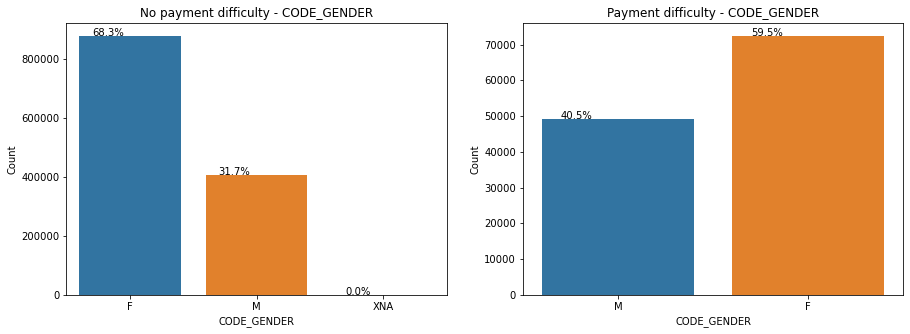

In [349]:
plot_countplot('CODE_GENDER')

In [315]:
all_apps_grouped = all_apps.groupby('TARGET')

In [316]:
genders = all_apps_grouped['CODE_GENDER'].value_counts(normalize=True)

In [319]:
genders.head()

TARGET  CODE_GENDER
0       F              0.683142
        M              0.316815
        XNA            0.000043
1       F              0.594804
        M              0.405196
Name: CODE_GENDER, dtype: float64

In [318]:
sns.countplot(x='CODE_GENDER', data=genders)
plt.show()

ValueError: Could not interpret input 'CODE_GENDER'